In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv("/kaggle/input/advertisement-click-on-ad/advertising.csv")

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


# **EDA**

# Daily Time Spent on Site

In [7]:
clicked_desc = df[df['Clicked on Ad'] == 1]['Daily Time Spent on Site'].describe()
not_clicked_desc = df[df['Clicked on Ad'] == 0]['Daily Time Spent on Site'].describe()

print("Descriptive Statistics for Users Who Clicked on Ads:")
print(clicked_desc)
print("\nDescriptive Statistics for Users Who Did Not Click on Ads:")
print(not_clicked_desc)

Descriptive Statistics for Users Who Clicked on Ads:
count    500.000000
mean      53.145780
std       12.822091
min       32.600000
25%       42.837500
50%       51.530000
75%       62.075000
max       91.370000
Name: Daily Time Spent on Site, dtype: float64

Descriptive Statistics for Users Who Did Not Click on Ads:
count    500.000000
mean      76.854620
std        7.560031
min       48.220000
25%       72.077500
50%       77.650000
75%       82.070000
max       91.430000
Name: Daily Time Spent on Site, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


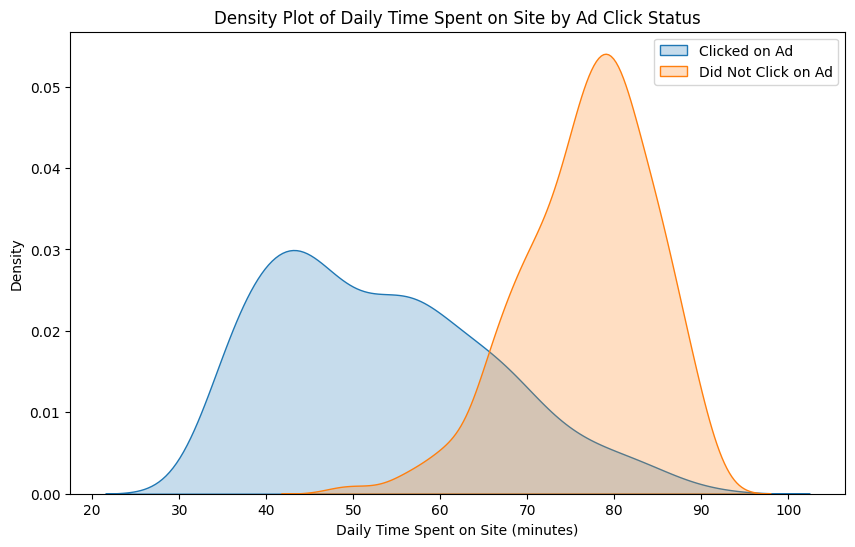

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Clicked on Ad'] == 1]['Daily Time Spent on Site'], label="Clicked on Ad", fill=True)
sns.kdeplot(df[df['Clicked on Ad'] == 0]['Daily Time Spent on Site'], label="Did Not Click on Ad", fill=True)
plt.title('Density Plot of Daily Time Spent on Site by Ad Click Status')
plt.xlabel('Daily Time Spent on Site (minutes)')
plt.ylabel('Density')
plt.legend()
plt.show()


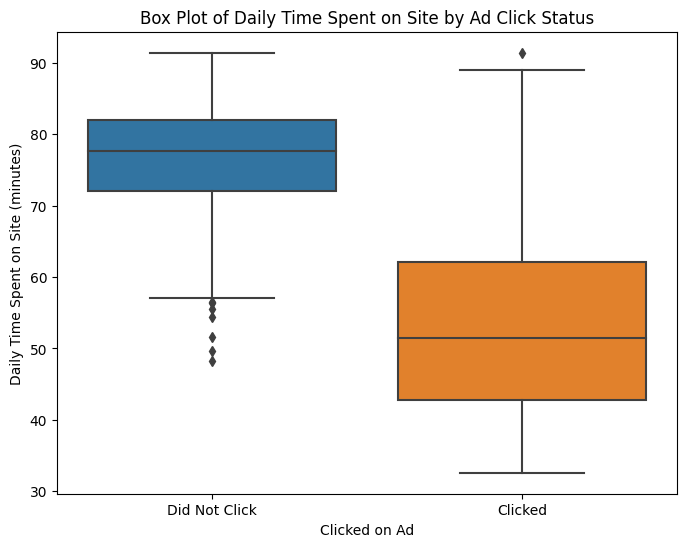

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Clicked on Ad', y='Daily Time Spent on Site', data=df)
plt.title('Box Plot of Daily Time Spent on Site by Ad Click Status')
plt.xlabel('Clicked on Ad')
plt.ylabel('Daily Time Spent on Site (minutes)')
plt.xticks([0, 1], ['Did Not Click', 'Clicked'])
plt.show()


Users who clicked on ads spent less time on the site on average compared to those who did not click on ads. This might seem counterintuitive at first glance, but it can be explained by several factors:
* **Ad Placement and Timing**: Ads might be placed in such a way that they are more likely to be clicked by users shortly after they arrive at the site. If the ads are compelling enough or if the users are specifically looking for something that the ad offers, they might click on them before engaging deeply with the site content.

* **User Intent**: Users who come to the site with a specific intent or need might click on ads that appear to fulfill that need quickly. In contrast, users who are browsing without a specific goal might spend more time on the site without necessarily clicking on ads.

* **Ad Relevance and Targeting**: The ads could be highly targeted and relevant to certain users, making those users more likely to click on them early during their visit. This indicates effective targeting by the ad algorithms, where ads are shown to users who are more likely to be interested in them based on their browsing behavior or demographic information.

* **Engagement vs. Conversion**: Users who spend a lot of time on the site may be more engaged with the content itself rather than the ads. This engagement doesn't necessarily translate to a higher likelihood of clicking on ads. Conversely, users who click on ads might do so because the ads are directly relevant to their interests or needs, leading to quicker conversions (ad clicks) with less overall time spent on the site.

# Age Group

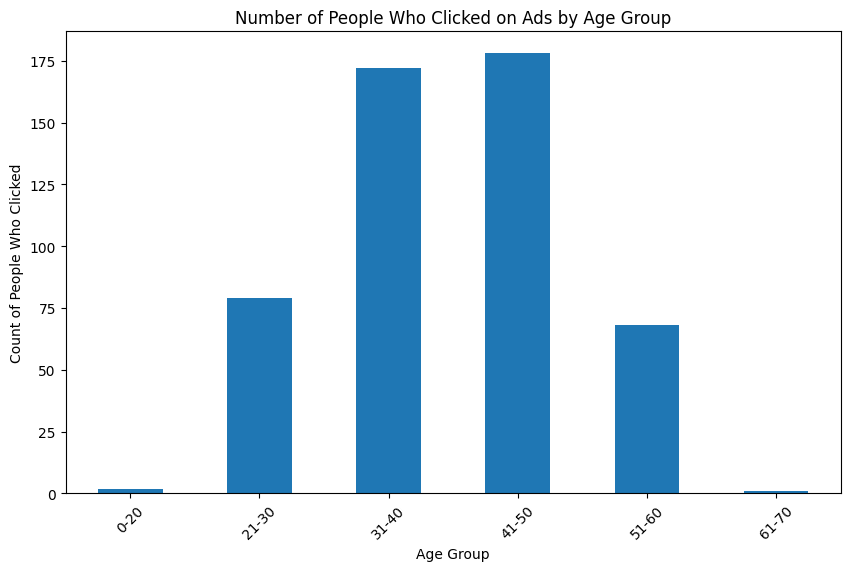

In [10]:
df['Age Group'] = pd.cut(df['Age'], 
                               bins=[0, 20, 30, 40, 50, 60, 70], 
                               labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70'])
clicked_data = df[df['Clicked on Ad'] == 1]
# Count the number of people who clicked on ads within each age group
clicked_counts = clicked_data['Age Group'].value_counts().sort_index()

# Plot the count in a bar chart
plt.figure(figsize=(10, 6))
clicked_counts.plot(kind='bar')
plt.title('Number of People Who Clicked on Ads by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count of People Who Clicked')
plt.xticks(rotation=45)
plt.show()

# Area Income

In [11]:
clicked_desc = df[df['Clicked on Ad'] == 1]['Area Income'].describe()
not_clicked_desc = df[df['Clicked on Ad'] == 0]['Area Income'].describe()

print("Area Income for Users Who Clicked on Ads:")
print(clicked_desc)
print("\nArea Income for Users Who Did Not Click on Ads:")
print(not_clicked_desc)

Area Income for Users Who Clicked on Ads:
count      500.000000
mean     48614.413740
std      14116.242232
min      13996.500000
25%      39106.620000
50%      49417.255000
75%      59241.045000
max      78520.990000
Name: Area Income, dtype: float64

Area Income for Users Who Did Not Click on Ads:
count      500.00000
mean     61385.58642
std       8904.06018
min      33239.20000
25%      55606.66250
50%      62275.40500
75%      67518.78250
max      79484.80000
Name: Area Income, dtype: float64


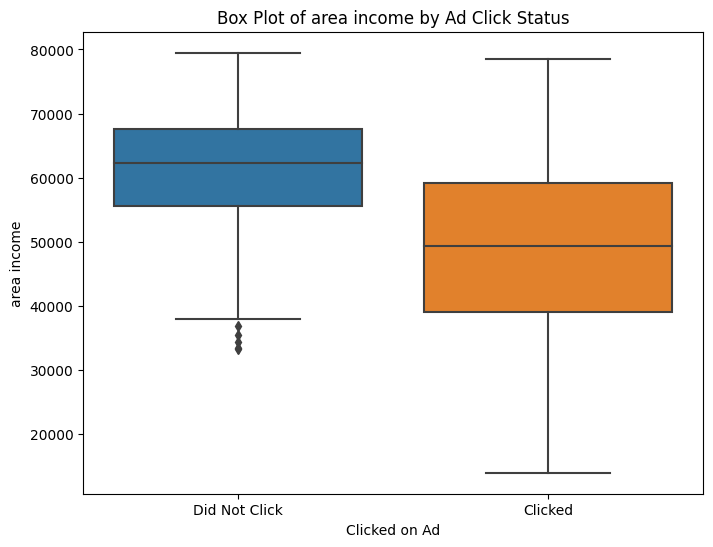

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Clicked on Ad', y='Area Income', data=df)
plt.title('Box Plot of area income by Ad Click Status')
plt.xlabel('Clicked on Ad')
plt.ylabel('area income')
plt.xticks([0, 1], ['Did Not Click', 'Clicked'])
plt.show()


Users who clicked on ads have a lower average area income compared to those who did not click on ads. This again might initially seem counterintuitive because one might expect higher-income users to have more disposable income, potentially making them more likely to engage with ads or pursue the products and services advertised. However, several factors could explain this observation as well:

* **Ad Relevance and Targeting**: Ads might be more effectively targeted toward users with specific income ranges, possibly offering products or services that are more appealing or relevant to those with lower incomes. This effective targeting can lead to higher click-through rates among these users.
* **Disposable Income and Product Interest**: Users with higher incomes might not necessarily have more interest in the types of products or services advertised. Their needs or interests could be different, or they might prefer to shop through other channels. In contrast, users with lower incomes might find the deals or products advertised online more appealing or relevant to their current needs and financial situation.
* **Ad Saturation and Engagement**: Higher-income users might be more likely to use ad-blocking technology or be less engaged with online ads due to ad saturation. They might have more experience navigating online spaces and, therefore, could be more adept at avoiding ads.
* **Economic Factors and Online Shopping Behavior**: Economic factors could influence how different income groups interact with online advertisements. Users with lower incomes might be more inclined to look for deals, discounts, or affordable products online, making them more likely to click on ads that promise such benefits.

# Internet Usage

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


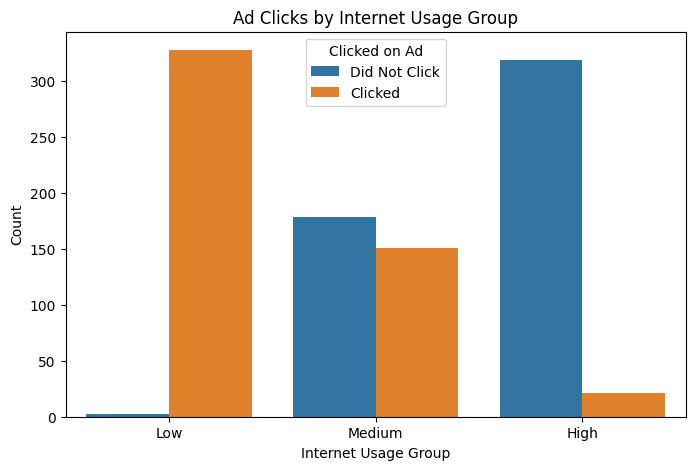

In [13]:
bins = [0, df['Daily Internet Usage'].quantile(0.33), df['Daily Internet Usage'].quantile(0.66), df['Daily Internet Usage'].max()]
labels = ['Low', 'Medium', 'High']
df['Internet Usage Group'] = pd.cut(df['Daily Internet Usage'], bins=bins, labels=labels, include_lowest=True)

# Plot the distribution of users who clicked on ads across internet usage groups
plt.figure(figsize=(8, 5))
sns.countplot(x='Internet Usage Group', hue='Clicked on Ad', data=df)
plt.title('Ad Clicks by Internet Usage Group')
plt.xlabel('Internet Usage Group')
plt.ylabel('Count')
plt.legend(title='Clicked on Ad', labels=['Did Not Click', 'Clicked'])
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


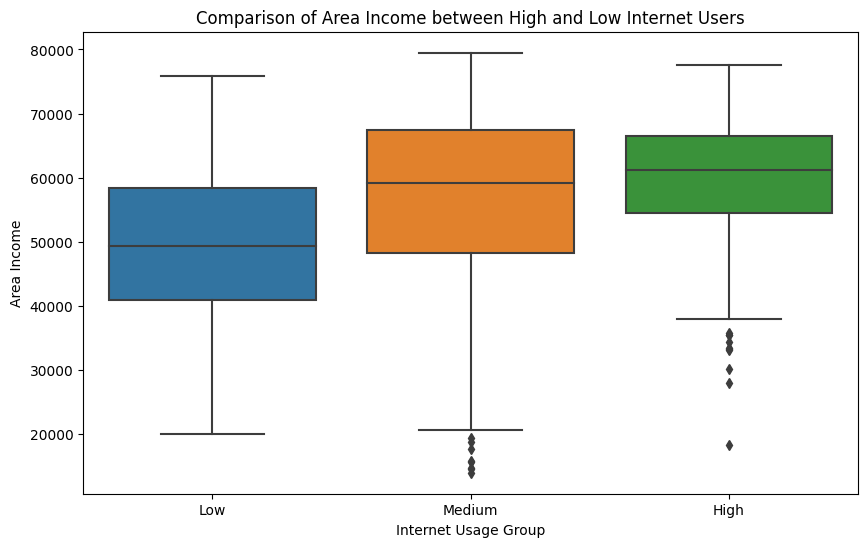

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


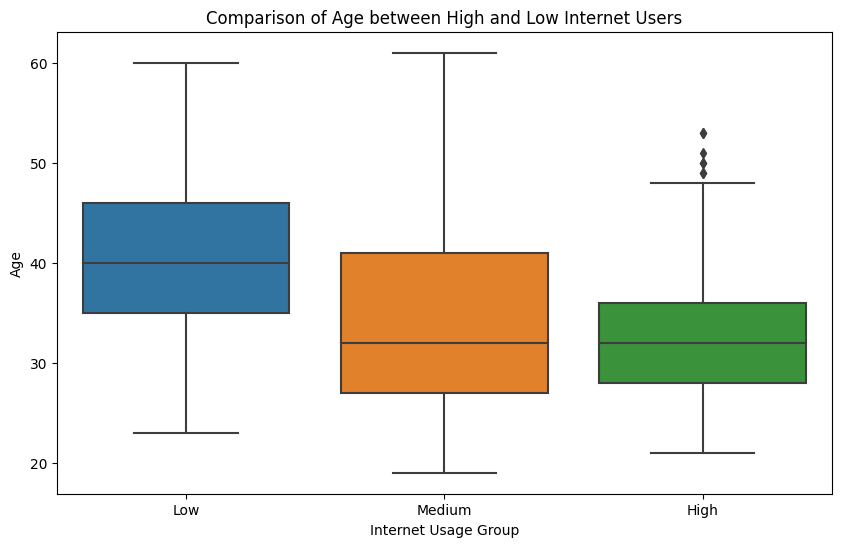

In [14]:
# Descriptive statistics for high vs. low internet users
high_internet_users = df[df['Internet Usage Group'] == 'High']
low_internet_users = df[df['Internet Usage Group'] == 'Low']

# Compare Area Income
plt.figure(figsize=(10, 6))
sns.boxplot(x='Internet Usage Group', y='Area Income', data=df)
plt.title('Comparison of Area Income between High and Low Internet Users')
plt.show()

# Compare Age
plt.figure(figsize=(10, 6))
sns.boxplot(x='Internet Usage Group', y='Age', data=df)
plt.title('Comparison of Age between High and Low Internet Users')
plt.show()

# Gender distribution

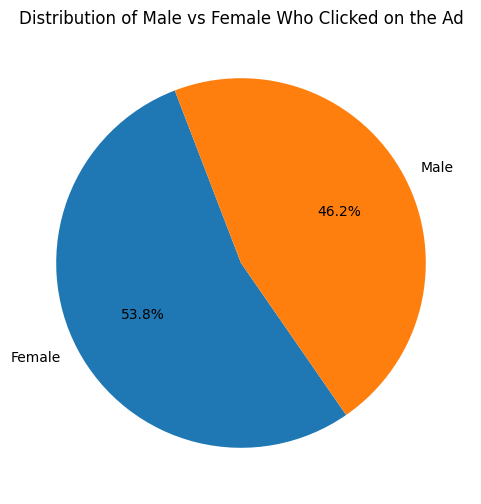

In [15]:
clicked_df = df[df['Clicked on Ad'] == 1]
gender_counts = clicked_df['Male'].value_counts()
labels = ['Female', 'Male']
percentages = (gender_counts / gender_counts.sum()) * 100

plt.figure(figsize=(6, 6))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=111)
plt.title('Distribution of Male vs Female Who Clicked on the Ad')
plt.show()

# Top 10 Countries

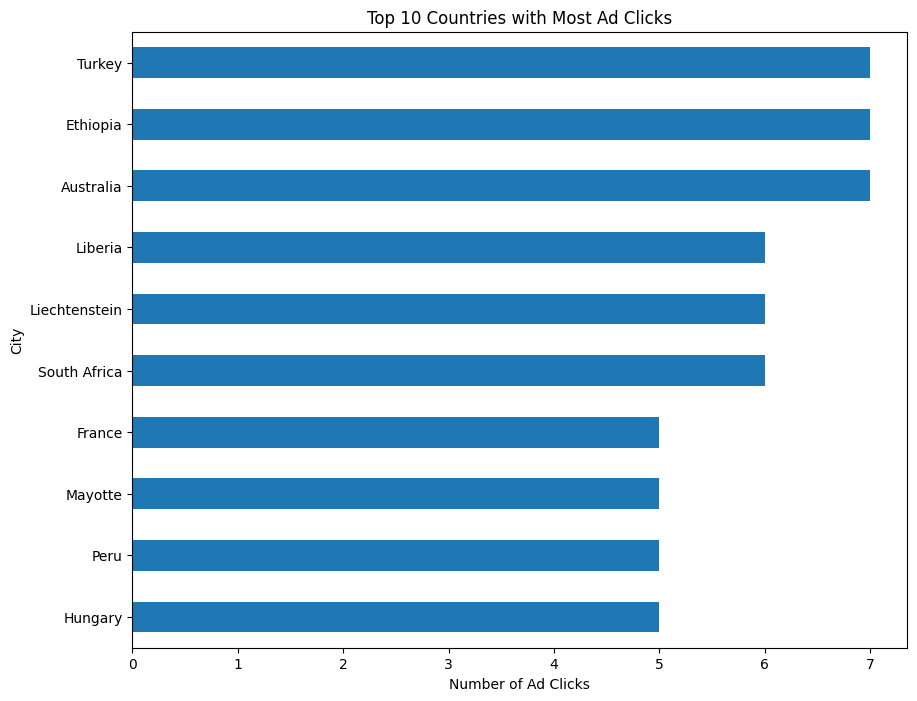

In [16]:
top_cities = clicked_df['Country'].value_counts().head(10)

# Plot horizontal bar chart for top 10 cities
plt.figure(figsize=(10, 8))
top_cities.sort_values().plot(kind='barh')
plt.title('Top 10 Countries with Most Ad Clicks')
plt.xlabel('Number of Ad Clicks')
plt.ylabel('City')
plt.show()

# Timestamp Analysis

In [17]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Month'] = df['Timestamp'].dt.month
df['DayOfWeek'] = df['Timestamp'].dt.day_name()
df['Hour'] = df['Timestamp'].dt.hour

clicked_ads = df[df['Clicked on Ad'] == 1]

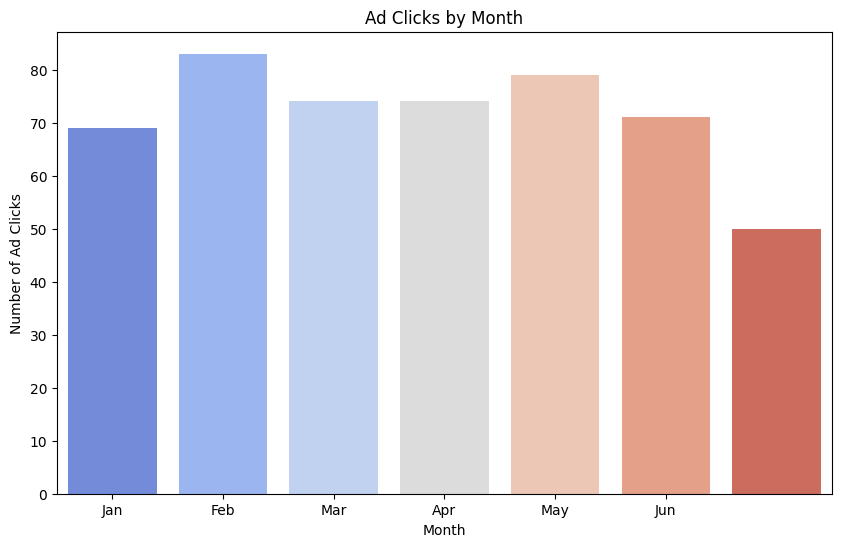

In [18]:
##Ad Clicks by Month
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=clicked_ads, palette='coolwarm')
plt.title('Ad Clicks by Month')
plt.xlabel('Month')
plt.ylabel('Number of Ad Clicks')
plt.xticks(ticks=range(0, 6), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])
plt.show()


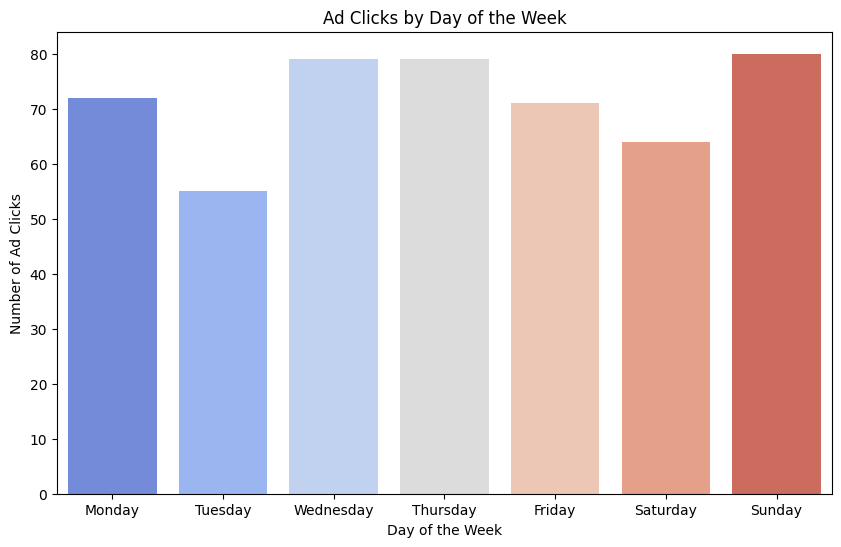

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='DayOfWeek', data=clicked_ads, palette='coolwarm', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Ad Clicks by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Ad Clicks')
plt.show()

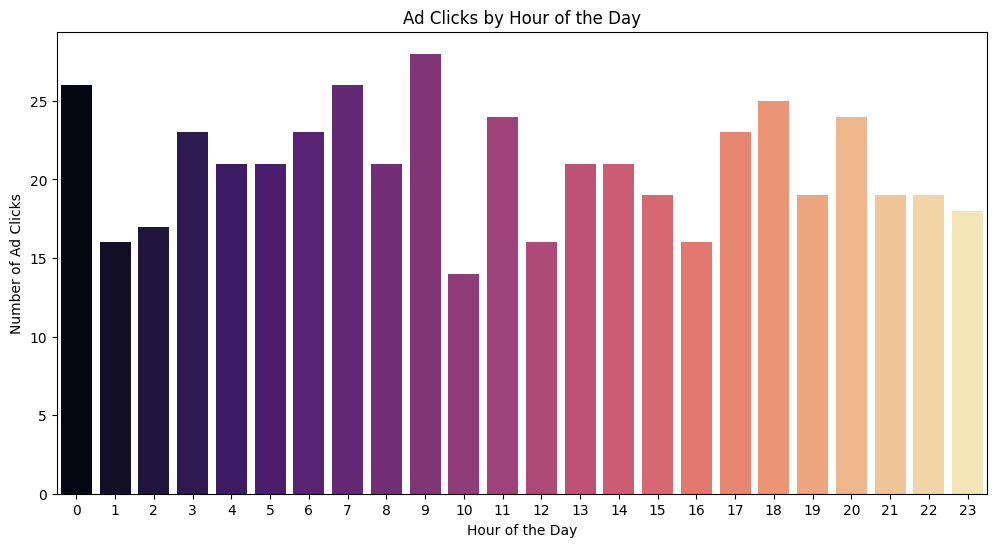

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=clicked_ads, palette='magma')
plt.title('Ad Clicks by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Ad Clicks')
plt.xticks(ticks=range(0, 24))
plt.show()

# **Cluster Analysis**

Why perform clusetr analysis?

* **Identifying User Segments**: Cluster analysis will group users into segments based on similarities in their features, such as demographics (age, income), online behavior (daily time spent on site, internet usage), and interaction with ads (whether they clicked on ads). This segmentation can reveal patterns that might not be apparent from a broader analysis.
 
* **Tailoring Marketing Strategies**: By understanding the characteristics of each user segment, you can tailor marketing strategies to better match the interests and behaviors of those segments. For example, if a cluster is identified as high-income, frequent internet users who rarely click on ads, a different approach or type of ad content might be more effective for engaging these users.

* **Improving Ad Targeting**: Insights from cluster analysis can improve ad targeting by identifying which user segments are more likely to engage with specific types of ads, leading to higher click-through rates and better campaign performance.

* **Product and Content Development**: Understanding user segments can also inform product development and content creation, ensuring that offerings are more closely aligned with the needs and preferences of different segments.

In [21]:
# feature selection
features = df[['Age', 'Area Income', 'Daily Internet Usage', 'Daily Time Spent on Site']]

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

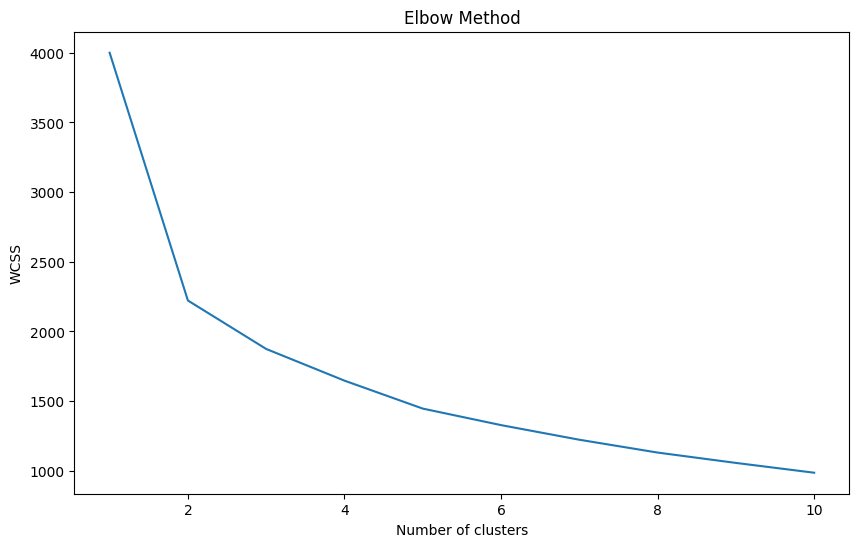

In [23]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(features_scaled)

df['Cluster'] = clusters

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cluster_summary = df.groupby('Cluster')[numeric_cols].mean()

In [26]:
cluster_summary.iloc[:,0:6]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Cluster,,,,,,
0,76.512453,31.460377,60855.712642,213.102528,0.498113,0.071698
1,50.984699,40.748120,58772.445263,142.116053,0.477444,0.973684
2,53.366029,41.647059,34867.656569,143.396520,0.441176,0.995098


How This Clusters Can Help

* **Ad Placement and Content Customization**: Understanding that Cluster 1 and Cluster 2 are more likely to click on ads, but for possibly different reasons, can help tailor the content and placement of ads. For example, Cluster 2, with lower income, might respond better to ads for more affordable products or discount offers.

* **User Engagement Strategies**: Knowing that Cluster 0 spends a lot of time online and on the site without clicking ads suggests potential for better engagement strategies or reevaluating the ad relevance for this group.

* **Demographic Targeting**: The clusters show distinct age and income profiles, which can be used to target ads based on demographic factors. For instance, different product categories might be advertised to the younger Cluster 0 vs. the older Clusters 1 and 2.

* **Behavioral Insights**: The high internet usage of Cluster 0 might indicate they are tech-savvy users who are good at avoiding ads or use ad blockers. This suggests exploring alternative marketing strategies for this segment.


# Clusters In Depth

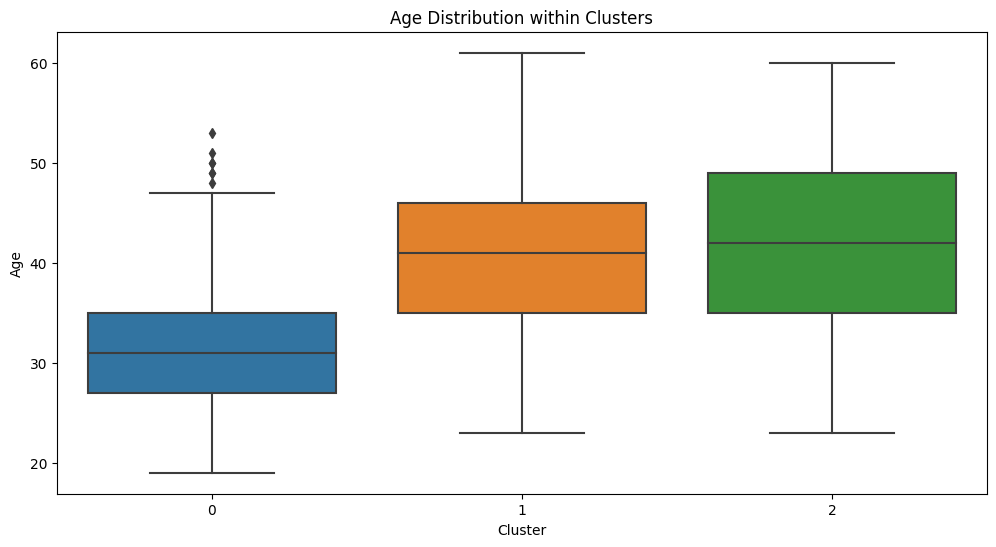

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Age', data=df)
plt.title('Age Distribution within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

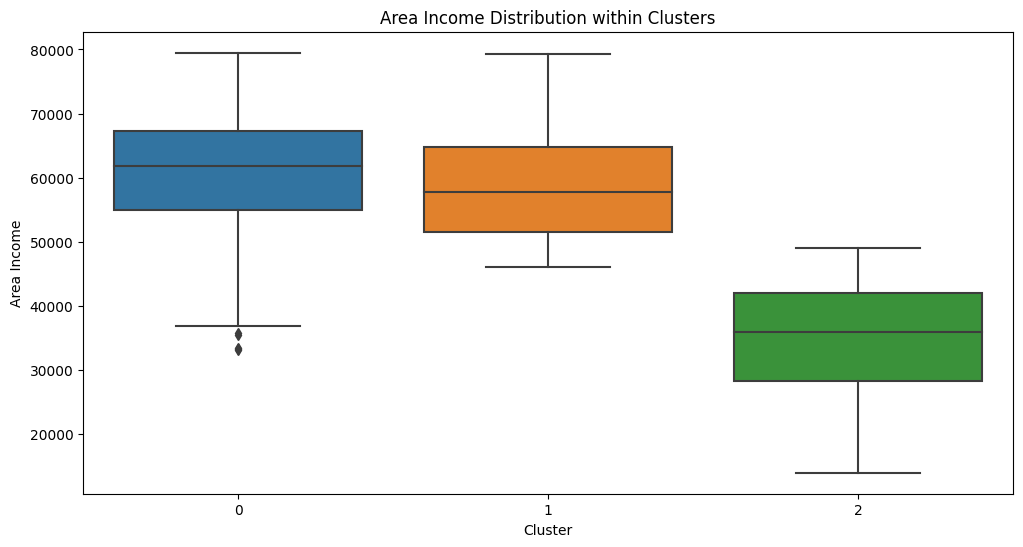

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Area Income', data=df)
plt.title('Area Income Distribution within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Area Income')
plt.show()

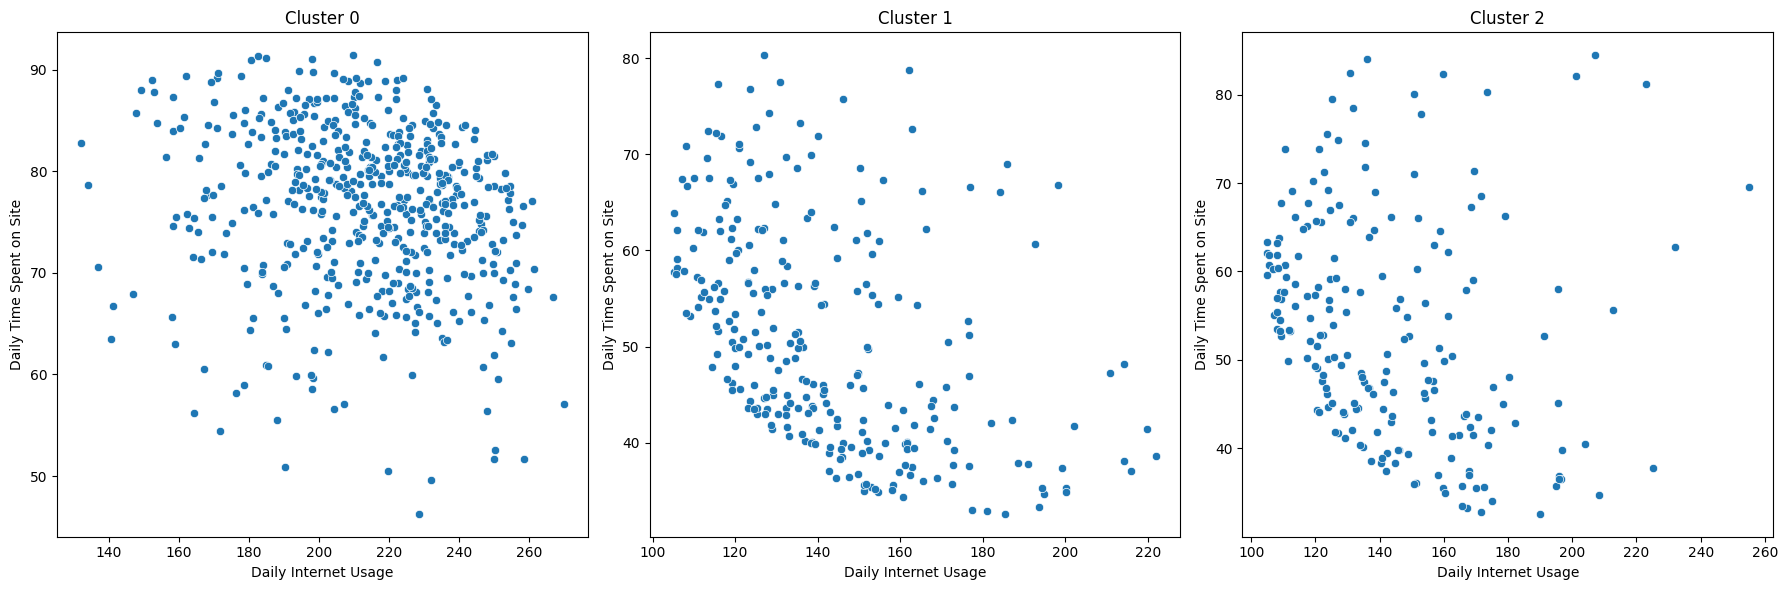

In [29]:
plt.figure(figsize=(18, 6))

for i in df['Cluster'].unique():
    # Create a scatter plot for each cluster
    plt.subplot(1, 3, i+1)  
    cluster_data = df[df['Cluster'] == i]
    sns.scatterplot(x='Daily Internet Usage', y='Daily Time Spent on Site', data=cluster_data)
    plt.title(f'Cluster {i}')
    plt.xlabel('Daily Internet Usage')
    plt.ylabel('Daily Time Spent on Site')

plt.tight_layout()
plt.show()

# **Conclusion**

Throughout this project, we conducted an extensive exploratory data analysis (EDA) on an advertising dataset with the aim of understanding the factors that influence users' likelihood to click on online ads. Our analysis covered various facets of user behavior and demographics, including daily time spent on the site, age distribution, area income, internet usage, gender distribution, and engagement patterns across time.

Our key findings include:

* User Engagement: Users who clicked on ads spent less time on the site and had lower area income on average, suggesting that ads might be effectively targeted at users who are likely to make quicker decisions and are seeking economical options.
* Demographics: Age and income distributions within ad-click clusters indicated distinct demographic segments with unique ad interaction patterns, highlighting opportunities for demographic-specific ad targeting.
* Internet Usage: Segmentation based on daily internet usage revealed that high internet users were not necessarily the most engaged with ads, suggesting a potential for optimizing ad content and placement for different levels of internet activity.
* Temporal Patterns: The timestamp analysis offered insights into when users are most likely to click on ads, which could inform the timing of ad campaigns for improved effectiveness.


Through cluster analysis, we discovered three distinct user groups, each with unique characteristics that can inform tailored advertising approaches:

* Cluster 0, characterized by high internet usage but low ad-click rates, suggesting the need for more engaging or relevant ad content.
* Cluster 1, showing moderate internet usage with the highest ad-click rates, indicating high potential value for targeted campaigns.
* Cluster 2, similar to Cluster 1 in behavior but with the lowest area income, suggesting sensitivity to economic factors.


Implications and Recommendations:

* Tailored Content: Develop ad content that aligns with the distinct preferences and behaviors identified within each cluster.
* Strategic Timing: Schedule ad campaigns to coincide with peak engagement times revealed by the timestamp analysis.
* Economic Targeting: Consider the economic profiles of each cluster when choosing products and messaging for ads.